In [25]:
import datetime
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [26]:
plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 5)  # Размер картинок

In [20]:
data = pd.read_excel('Капельницы_АУ_ВУ.xlsx', dtype={'Sum([Количество])':int})

In [21]:
data['Период'] = data['Дата приема'].dt.to_period('M')

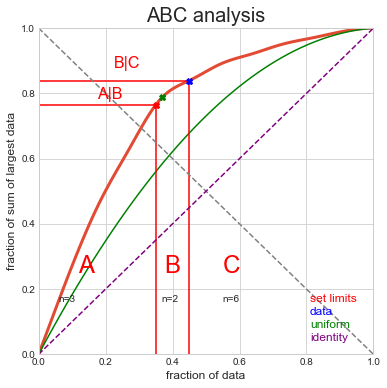

In [35]:
from abc_analysis import abc_analysis, abc_plot

# Perform an ABC analysis on a numeric vector (without plotting)
dctAnalysis = abc_analysis([1, 15, 25, 17, 2, 3, 5, 6, 2, 3, 22])

# Perform an ABC analysis with plotting
dctAnalysis = abc_analysis([1, 15, 25, 17, 2, 3, 5, 6, 2, 3, 22], True)

# Plot saved results of an ABC analysis
#abc_plot(dctAnalysis)

In [33]:
service_group_data_au = data[data['АУ/ВУ'] == 'АУ'].groupby('Наименование услуги').agg({'Sum([Всего начислено])':sum, 'Sum([Количество])':sum})
service_group_data_vu = data[data['АУ/ВУ'] == 'ВУ'].groupby('Наименование услуги').agg({'Sum([Всего начислено])':sum, 'Sum([Количество])':sum})

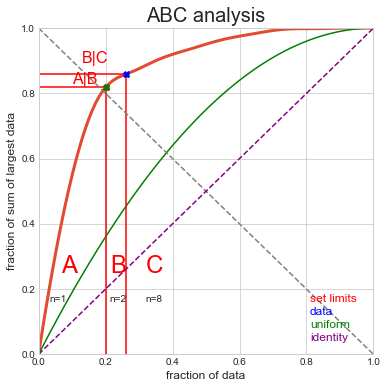

In [38]:
dctAnalysis = abc_analysis(service_group_data_au['Sum([Всего начислено])'],True)

In [37]:
dctAnalysis

{'ABLimit': 9092307.5,
 'BCLimit': 2296570.0,
 'ABexchanged': False,
 'Aind': [4],
 'Bind': [2, 9],
 'Cind': [0, 1, 3, 5, 6, 7, 8, 10],
 'smallestAData': 0.818518632784236,
 'smallestBData': 0.8587517393069135,
 'AlimitIndInInterpolation': 20,
 'BlimitIndInInterpolation': 26,
 'p': 0      0.00
 1      0.01
 2      0.02
 3      0.03
 4      0.04
        ... 
 96     0.96
 97     0.97
 98     0.98
 99     0.99
 100    1.00
 Name: Effort, Length: 101, dtype: float64,
 'ABC': 0      0.000000
 1      0.065927
 2      0.129544
 3      0.190798
 4      0.249634
          ...   
 96     1.000000
 97     1.000000
 98     1.000000
 99     1.000000
 100    1.000000
 Name: Yield, Length: 101, dtype: float64,
 'A': {'Effort': 0.2, 'Yield': 0.818518632784236},
 'B': {'Effort': 0.2, 'Yield': 0.818518632784236},
 'C': {'Effort': 0.26, 'Yield': 0.8587517393069135},
 'CleanedData': 0        80817.00
 1        50602.50
 2      2296570.00
 3       877875.50
 4     16395611.52
 5       975588.00
 6       4

In [42]:
service_group_data_au.to_excel('au.xlsx')

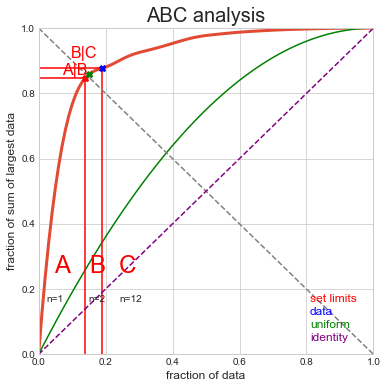

{'ABLimit': 2146182.2800000003,
 'BCLimit': 396630.5,
 'ABexchanged': True,
 'Aind': [3],
 'Bind': [4, 7],
 'Cind': [0, 1, 2, 5, 6, 8, 9, 10, 11, 12, 13, 14],
 'smallestAData': 0.8484206904144342,
 'smallestBData': 0.8773275222780295,
 'AlimitIndInInterpolation': 14,
 'BlimitIndInInterpolation': 19,
 'p': 0      0.00
 1      0.01
 2      0.02
 3      0.03
 4      0.04
        ... 
 96     0.96
 97     0.97
 98     0.98
 99     0.99
 100    1.00
 Name: Effort, Length: 101, dtype: float64,
 'ABC': 0      0.000000
 1      0.126930
 2      0.240703
 3      0.342056
 4      0.431729
          ...   
 96     0.999979
 97     0.999988
 98     0.999992
 99     0.999996
 100    1.000000
 Name: Yield, Length: 101, dtype: float64,
 'A': {'Effort': 0.14, 'Yield': 0.8484206904144342},
 'B': {'Effort': 0.15, 'Yield': 0.8583333284897381},
 'C': {'Effort': 0.19, 'Yield': 0.8773275222780295},
 'CleanedData': 0        7202.00
 1      199184.10
 2      187598.00
 3     6027863.93
 4      396630.50
 5    

In [40]:
abc_analysis(service_group_data_vu['Sum([Всего начислено])'],True)

In [43]:
service_group_data_vu.to_excel('vu.xlsx')

In [45]:
abc_analysis?